<a href="https://colab.research.google.com/github/Kim-JungHyun01/AIStudy24/blob/master/%ED%85%8C%EC%8A%A4%ED%8A%B8/%EC%9D%B4%EC%9B%83%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이웃회귀

시기 : 여름 농어철

농어주문이 크게 늘어남 => 무게단위로 판매하기로 결정

이유 : 가격측정 원활 및 소비자들의 불만 완화

단, 공급처에서 생선무게를 잘못 측정해서 공급할 수 도 있음

---

- 농어의 무게를 재측정
- 다른 데이터의 정상범위가 있으니 예측할수 있을까?
- 예측하는 것 : 회귀
- 외부에서 56개의 샘플

지도학습
1. 분류(2진분류_0,1)
2. 회귀(예측 : 확률_임의의 숫자로 예측)

회귀 : 두 변수 사이에 상관관계를 분석하는 방법

In [ ]:
#리눅스 명령어 : 코랩의 가상머신(한글 나눔폰트 폰트적용)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## 데이터준비

In [ ]:
#농어의 샘플자료(56개)
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

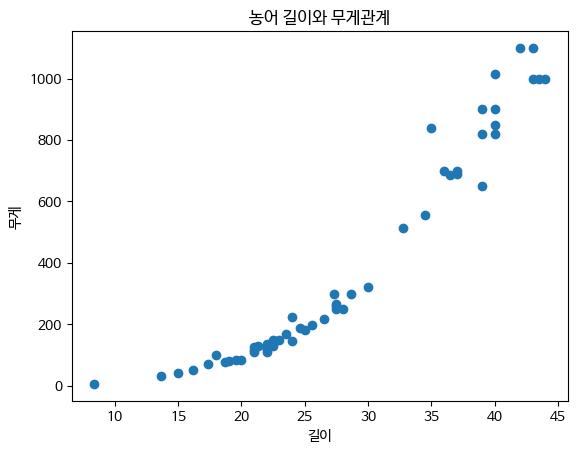

In [ ]:
#그래프
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.title("농어 길이와 무게관계")
plt.scatter(perch_length, perch_weight)
plt.xlabel("길이")
plt.ylabel("무게")
plt.show()

#결론 : 길이와 무게의 비례관계

## k-최근접 이웃 알고리즘 회귀

공동 : 예측하려는 샘플에 가장 가까운 샘플 k개를 선택<br/><br/>

k-최근접 이웃 분류
- 최근접 이웃을 비교하여 과반수의 것으로 결과를 도출
- 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측
- k=3이라고 가정하면, 2개의 사각형, 1개의 삼각형이 있어 과반수인 사각형으로 판단

k-최근접 이웃 회귀
- 샘플에서 최근접 이웃들의 평균값과 가장 가까운 것으로 결과 도출
- k=3이라고 가정하면, 100,80,60의 평균값인 80을 보아 타켓값을 판단

=> 그래프에서 동떨어진 값들은 제외

## 데이터 전처리(sklearn)

In [ ]:
#훈련세트 : 2차원배열사용
# perch_length : 1차원배열이기에 이를 나눈 입력테이터(train_input, test_input)도 1차원배열임
# 정답데이터(target)은 x
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

### .reshape()

2개의 특성(길이, 무게)로 사용했었기 때문에 자연스럽게 열이 2개인 2차원배열을 사용했었지만,
이번에는 특성이 1개로 수동으로 2차원배열을 만들어야함->numpy.reshape()
- (4,) -> (2,2)크기로 바꿔줌

In [ ]:
# [3,] -> [3,1] 2차원 배열을 사용해야함으로 억지로 변환 reshape() 메서드 활용 (4,) -> (2,2)
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [ ]:
# 2차원배열로 변환
test_array = test_array.reshape(2,2)
print(test_array.shape)
print(test_array)

(2, 2)
[[1 2]
 [3 4]]


In [ ]:
#입력데이터인 train_input과 test_input을 2차원 배열로 바꿔야함
# print(train_input.shape) : (42,) -> trian_input.reshape(42,1)
#numpy는 배열의 크기를 자동으로 지정하는 기능도 제공(-1)값을 넣으면 됨

# -1 : 지정하면 원소개수로 모두 채우라는 의미(매번 원소의 크기를 외우지 않아도 됨)
# 1 : 정답데이터가 없기때문에 전부 정답인 것으로 하겠다는 의미
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 훈련

k-최근접 알고리즘

- 분류 : from sklearn.neighbors import **KNeighborsClassifier**
    
    => 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율(정확도) -> 예측값

- 회귀 : from sklearn.neighbors import **KNeighborsRegressor**
   
    => 평가결과 : 결정계수(R^2)_타깃의 평균 정도를 예측하는 수준(0~1 : 에측이 정확할수록 1에 가까움)
    
    => R^2 = 1- {(타깃-예측)^2의 합 / (타깃-평균)^2의 합}

In [ ]:
#k-최근접 회귀 알고리즘
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

## 훈련평가

평가 종류
1. 과대적합

    훈련세트 **>** 테스트세트
    
    점수가 **100%(90%이상이면)**인 경우

2. 과소적합

    훈련세트 **<** 테스트세트
    
    두 점수가 **모두 낮은** 경우

In [ ]:
#훈련점수확인
print("train : ",knr.score(train_input, train_target))
print("test  : ",knr.score(test_input, test_target))
#결론 : 과소적합(0.96 < 0.99)

train :  0.9698823289099254
test  :  0.992809406101064


In [ ]:
#위 결과를 보면 모델을 훈련세트에 훈련하면 훈련세트에 잘 맞는 모델이 만들어짐
#이 모델을 훈련세트와 테스트 세트에서 평가하면 두값중 어느 것이 높을까?
#보통 훈련세트의 점수가 조금 더 높게 나옴

### 결정계수_R^2

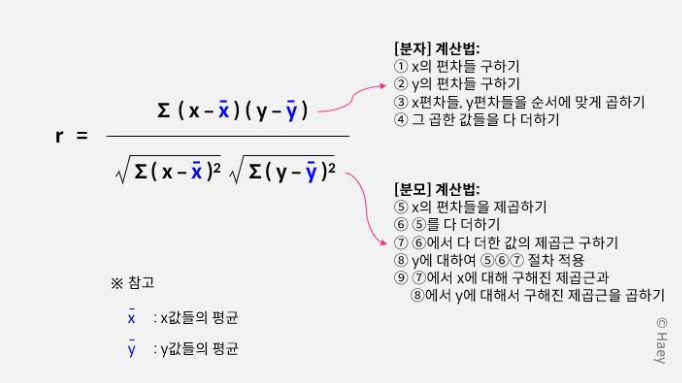

In [ ]:
# mean_absolute_error : 절대값 오차를 평균하여 반환
from sklearn.metrics import mean_absolute_error

#테스트 세트에 대한 예측(prediction)
test_prediction = knr.predict(test_input)

#테스트 세트에 대한 평균 절댓값 오차 계산
mae = mean_absolute_error(test_target, test_prediction)

print(mae)
#결론 : 약 19정도 타깃값과 다르다.(타깃과 예측한 값 사이의 차이)

19.157142857142862


## 재 훈련(기본값조정)

In [ ]:
#이웃 참조갯수 조정
knr.n_neighbors = 3
knr.fit(train_input, train_target)
#훈련점수
print("train : ",knr.score(train_input, train_target))
print("test  : ",knr.score(test_input, test_target))
#결론 : 과대, 과소적합 해결
#자세히는 과대적합이지만, 데이터가 많이 없기에 양호한 것

train :  0.9804899950518966
test  :  0.9746459963987609


### 기본값 조정 함수

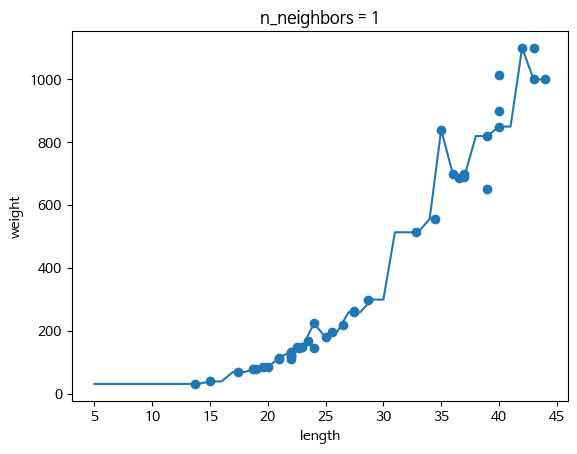

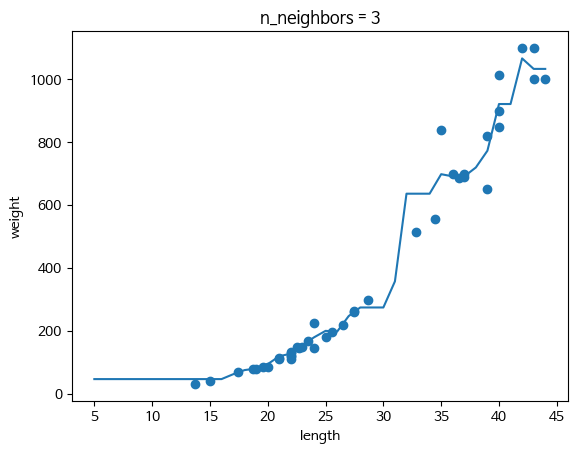

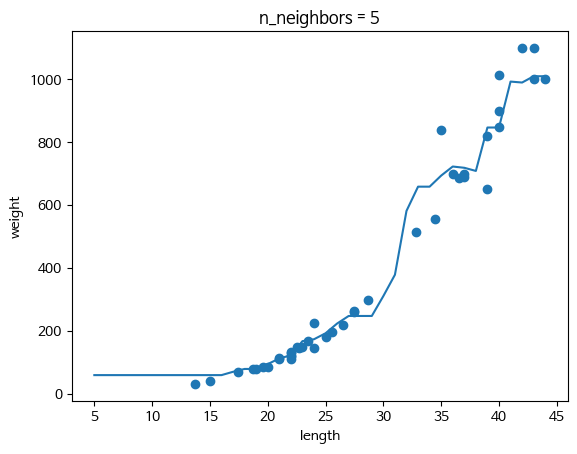

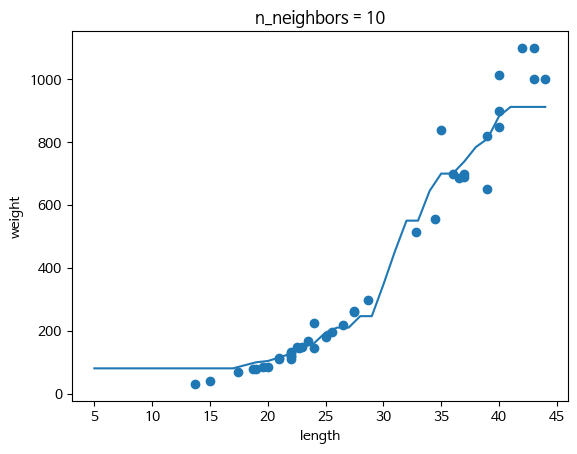

In [ ]:
knr = KNeighborsRegressor()

#5~45까지 x좌표를 만듬
x= np.arange(5,45).reshape(-1,1)

#참고갯수조정 : 1,3,5,10
for n in [1,3,5,10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)

    #지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)

    #훈련세트와 예측 결과 그래프
    plt.scatter(train_input, train_target)  #점
    plt.plot(x, prediction) #실선
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel("length")
    plt.ylabel("weight")
    plt.show()